<a href="https://colab.research.google.com/github/NatnaelTigistu/CNN/blob/main/Handwritten_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=12,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=2)


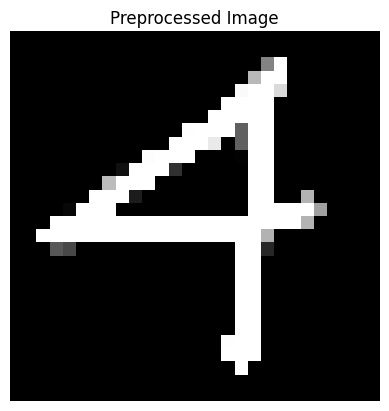

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted digit: 4


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/Colab Notebooks/Screenshot 2025-09-26 104903.png' # Change this to the path of your new image

img = cv2.imread(img_path) # Load image

if img is not None:
    # Convert image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28 pixels
    img = cv2.resize(img, (28, 28))

    # Invert colors if background is white (average pixel value is high)
    if np.mean(img) > 128: # Assuming 128 is a good threshold for white background
        img = cv2.bitwise_not(img)

    # Display the preprocessed image
    plt.imshow(img, cmap='gray')
    plt.title("Preprocessed Image")
    plt.axis('off')
    plt.show()

    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=-1) # Add channel dimension
    img = np.expand_dims(img, axis=0) # Add batch dimension

    prediction = model.predict(img)
    print("Predicted digit:", np.argmax(prediction))
else:
    print(f"Error: Could not load image from {img_path}. Please check the file path.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


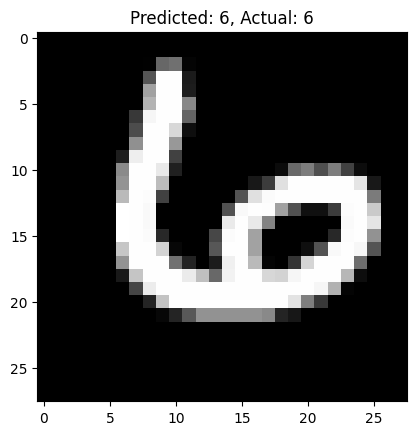

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Pick one test image
idx = 665
img = x_test[idx].reshape(1,28,28,1)

# Predict
prediction = model.predict(img)
predicted_label = np.argmax(prediction)

# Show result
plt.imshow(x_test[idx].reshape(28,28), cmap="gray")
plt.title(f"Predicted: {predicted_label}, Actual: {y_test[idx]}")
plt.show()
